<a href="https://colab.research.google.com/github/aharikrishnan0810/v3_Analutics/blob/main/COVID19_India_Analysis_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 India Analysis and Prediction
This notebook explores COVID-19 data in India using case, vaccination, and testing datasets. We perform data cleaning, visualizations, and a simple machine learning model to predict death counts.

## Importing Required Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


## Loading the Datasets

In [3]:

# Update the path if running locally or mount from drive
cases_path = 'covid_19_india.csv'
vaccine_path = 'covid_vaccine_statewise.csv'
testing_path = 'StatewiseTestingDetails.csv'

df_cases = pd.read_csv(cases_path)
df_vaccine = pd.read_csv(vaccine_path)
df_testing = pd.read_csv(testing_path)


## Data Cleaning and Preprocessing

In [4]:

# Cleaning COVID Cases Data
df_cases['Date'] = pd.to_datetime(df_cases['Date'], infer_datetime_format=True)
df_cases['ConfirmedIndianNational'] = pd.to_numeric(df_cases['ConfirmedIndianNational'], errors='coerce')
df_cases['ConfirmedForeignNational'] = pd.to_numeric(df_cases['ConfirmedForeignNational'], errors='coerce')

# Vaccination Data
df_vaccine.columns = df_vaccine.columns.str.strip()
df_vaccine['Updated On'] = pd.to_datetime(df_vaccine['Updated On'], infer_datetime_format=True)

# Testing Data
df_testing['Date'] = pd.to_datetime(df_testing['Date'], infer_datetime_format=True)
df_testing.columns = df_testing.columns.str.strip()


## Exploratory Data Analysis - COVID-19 Cases

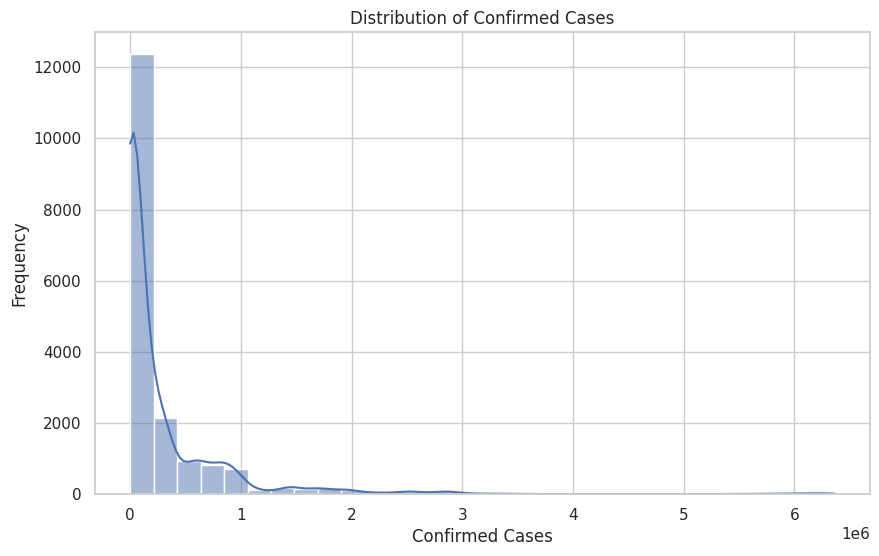

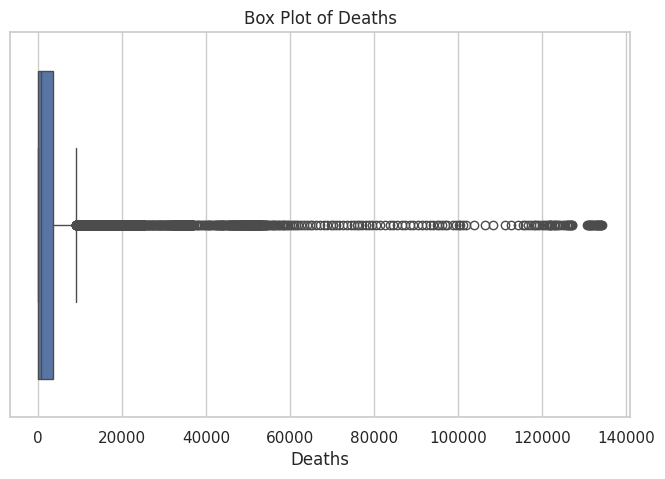

In [5]:

plt.figure(figsize=(10, 6))
sns.histplot(df_cases['Confirmed'], bins=30, kde=True)
plt.title('Distribution of Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cases['Deaths'])
plt.title('Box Plot of Deaths')
plt.xlabel('Deaths')
plt.show()


## EDA - Vaccination Data

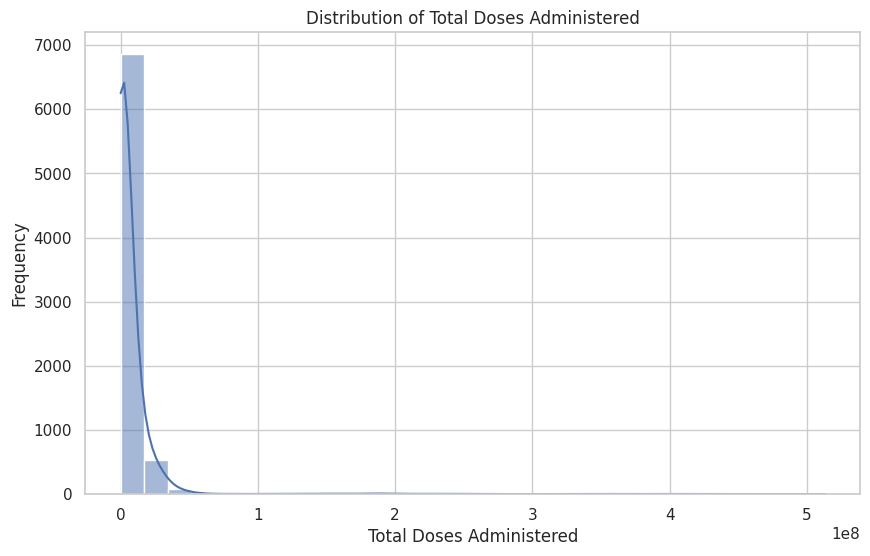

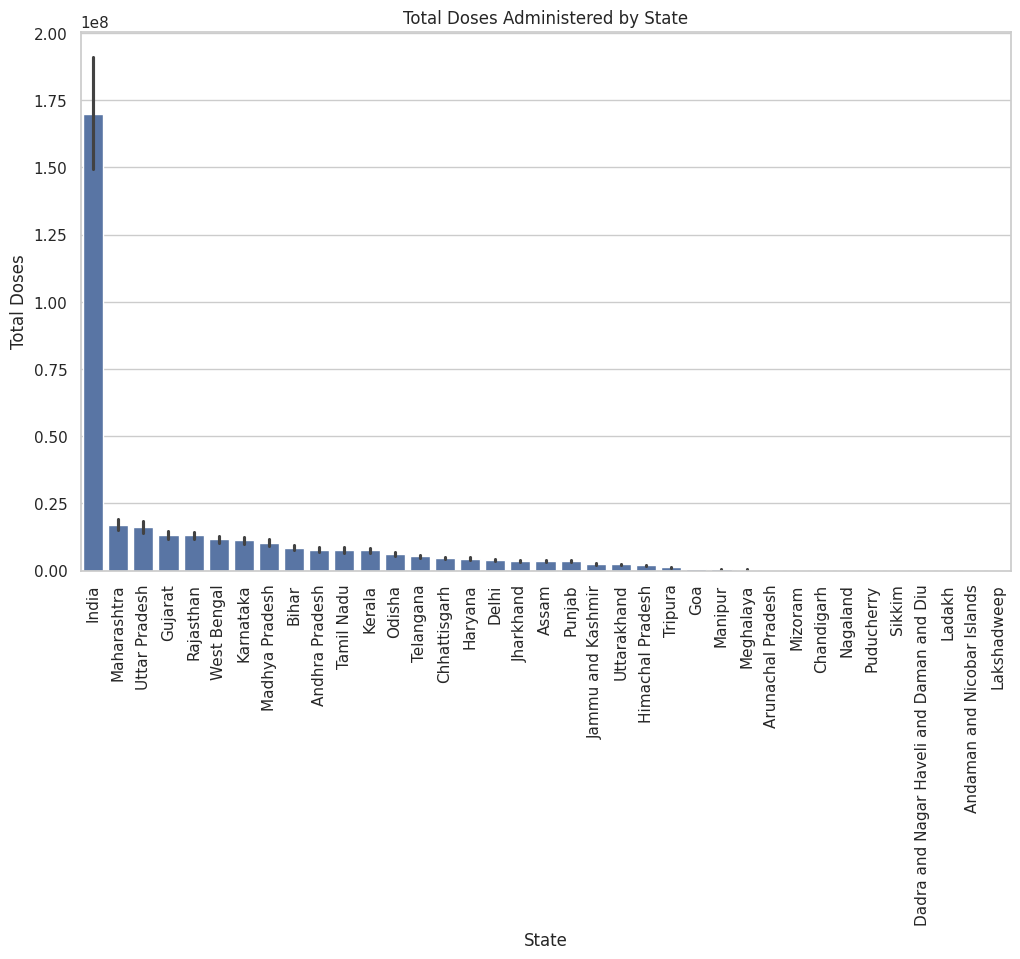

In [6]:

plt.figure(figsize=(10, 6))
sns.histplot(df_vaccine['Total Doses Administered'], bins=30, kde=True)
plt.title('Distribution of Total Doses Administered')
plt.xlabel('Total Doses Administered')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 7))
state_order = df_vaccine.groupby('State')['Total Doses Administered'].sum().sort_values(ascending=False).index
sns.barplot(data=df_vaccine, x='State', y='Total Doses Administered', order=state_order)
plt.xticks(rotation=90)
plt.title('Total Doses Administered by State')
plt.xlabel('State')
plt.ylabel('Total Doses')
plt.show()


## EDA - Testing Details

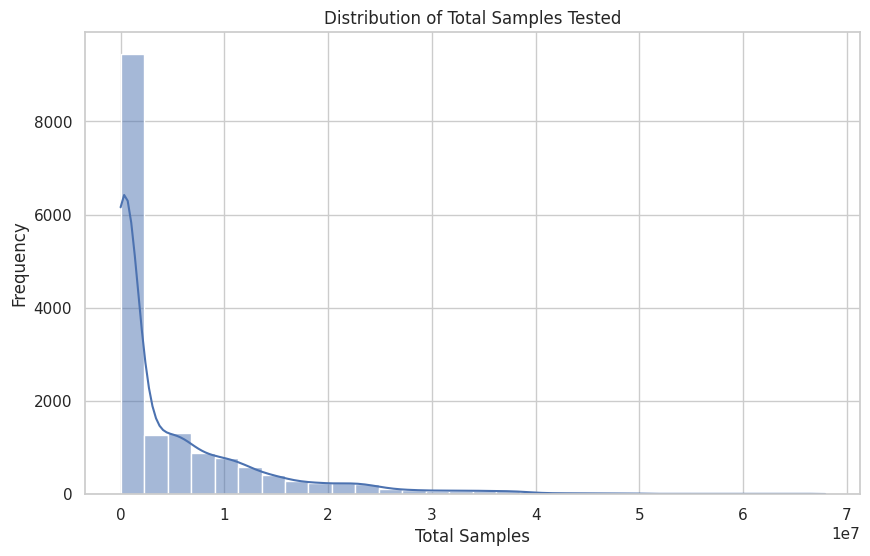

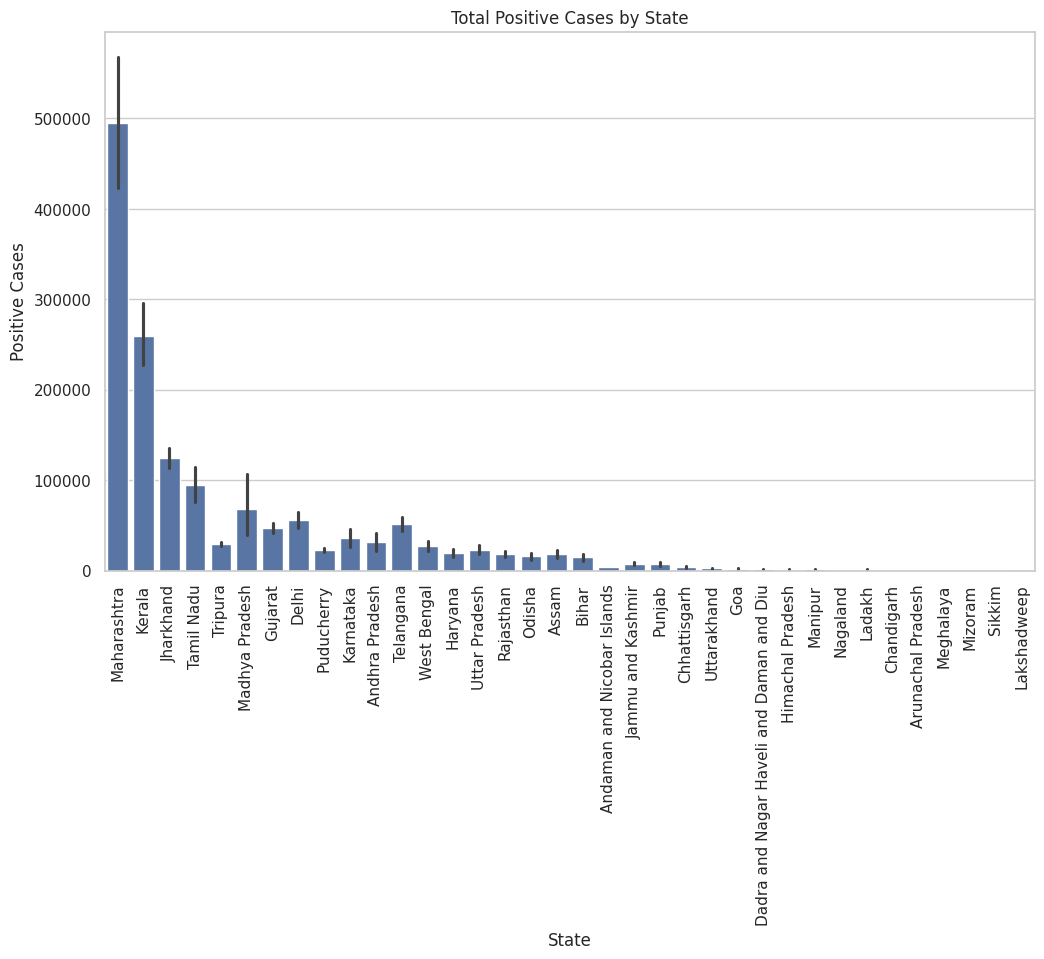

In [7]:

plt.figure(figsize=(10, 6))
sns.histplot(df_testing['TotalSamples'], bins=30, kde=True)
plt.title('Distribution of Total Samples Tested')
plt.xlabel('Total Samples')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 7))
state_order_testing = df_testing.groupby('State')['Positive'].sum().sort_values(ascending=False).index
sns.barplot(data=df_testing, x='State', y='Positive', order=state_order_testing)
plt.xticks(rotation=90)
plt.title('Total Positive Cases by State')
plt.xlabel('State')
plt.ylabel('Positive Cases')
plt.show()


## Predictive Modeling - Deaths Based on Confirmed and Cured Cases

Mean Squared Error: 19137822.648422334
R2 Score: 0.8554287227712816


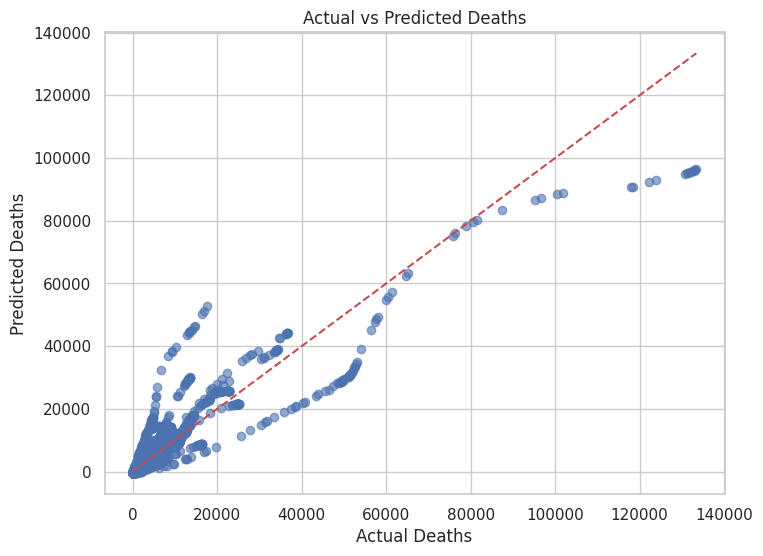

In [8]:

features = ['Confirmed', 'Cured']
target = 'Deaths'

model_data = df_cases[features + [target]].dropna()
X = model_data[features]
y = model_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Deaths')
plt.ylabel('Predicted Deaths')
plt.title('Actual vs Predicted Deaths')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


## Summary and Future Work


- Cleaned and preprocessed COVID-19 datasets including cases, testing, and vaccination.
- Visualized key patterns and statistics using histograms, bar plots, and scatter plots.
- Built a Linear Regression model to estimate deaths based on confirmed and cured cases (R² ≈ 0.85).
- **Future Ideas**:
  - Add time series forecasting (Prophet, ARIMA)
  - Deeper comparison across states over time
  - Evaluate ensemble or non-linear models
